In [21]:
# Import required libraries and dependencies
import pandas as pd
import hvplot.pandas
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [22]:
# Load the data into a Pandas DataFrame
df_market_data = pd.read_csv(
    "Resources/crypto_market_data.csv",
    index_col="coin_id")

# Display sample data
df_market_data.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [23]:
# Generate summary statistics
df_market_data.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


In [24]:
# Plot your data to see what's in your DataFrame
df_market_data.hvplot.line(
    width=800,
    height=400,
    rot=90
)

:NdOverlay   [Variable]
   :Curve   [coin_id]   (value)

---

### Prepare the Data

In [67]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
import pandas as pd
import hvplot.pandas
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [73]:
# Load the original DataFrame
df_market_data = pd.read_csv("Resources/crypto_market_data.csv", index_col="coin_id")

# Create a DataFrame with the scaled data
scaler = StandardScaler()
df_market_data_scaled = scaler.fit_transform(df_market_data)
df_market_data_scaled = pd.DataFrame(df_market_data_scaled, columns=df_market_data.columns, index=df_market_data.index)

# Reset the index to include coin_id as a column
df_market_data.reset_index(inplace=True)

# Copy the crypto names from the original DataFrame
df_market_data_scaled['coin_id'] = df_market_data['coin_id']

# Set the coin_id column as index
df_market_data.reset_index(inplace=True)

# Display the scaled DataFrame
df_market_data_scaled.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,coin_id
coin_id,,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637,NaN
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352,NaN
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061,NaN
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546,NaN
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317,NaN


---

### Find the Best Value for k Using the Original Scaled DataFrame.

In [139]:
# Create a list with the number of k-values from 1 to 12
k_values = range(1, 12)

In [128]:
# Create an empty list to store the inertia values
inertia = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using `df_market_data_scaled`
# 3. Append the model.inertia_ to the inertia list
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(df_market_data_scaled)
    inertia.append(kmeans.inertia_)

c:\Users\dileb\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\dileb\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\dileb\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\dileb\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows wi

In [129]:
# Verify that the lengths of k_values and inertia are the same
if len(k_values) == len(inertia):
    # Create a DataFrame with the data to plot the Elbow curve
    elbow_data = pd.DataFrame({'k': k_values, 'inertia': inertia})

In [120]:
    
# Create a dictionary with the data to plot the Elbow curve
elbow_data_pca = pd.DataFrame({'k': k_values, 'inertia': inertia})

print(f"Length mismatch: k_values({len(k_values)}) and inertia({len(inertia)})")
# Create a DataFrame with the data to plot the Elbow curve
elbow_data = pd.DataFrame({'k': k_values, 'inertia': inertia})

Length mismatch: k_values(11) and inertia(11)


c:\Users\dileb\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\dileb\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\dileb\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\dileb\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows wi

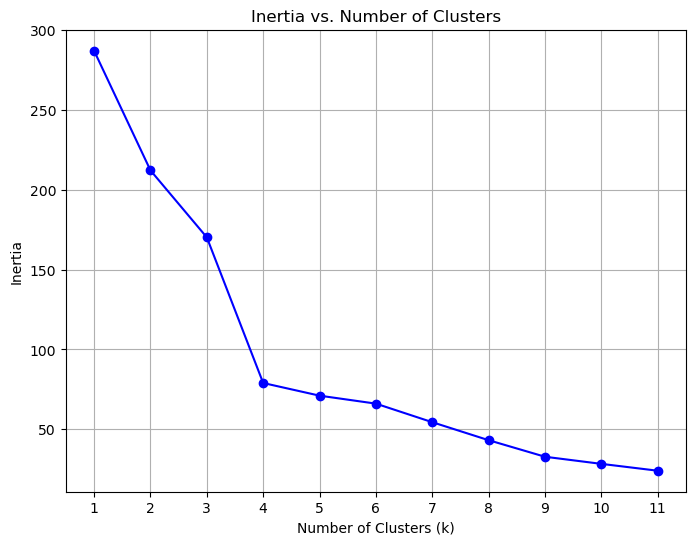

In [126]:
import matplotlib.pyplot as plt
# Plot a line chart with all the inertia values computed with
# the different values of k to visually identify the optimal value for k.
# Normalize the data
scaler = StandardScaler()
df_market_data_scaled = scaler.fit_transform(df_market_data)

# Find the best value for k using the normalized data
inertia_values = []
k_values = range(1, 12)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_market_data_scaled)
    inertia_values.append(kmeans.inertia_)

# Plot a line chart with all the inertia values computed with
# the different values of k to visually identify the optimal value for k.
plt.figure(figsize=(8, 6))
plt.plot(k_values, inertia_values, marker='o', linestyle='-', color='b')
plt.title('Inertia vs. Number of Clusters')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(k_values)  # Show every k value on the x-axis
plt.grid(True)
plt.show()

#### Answer the following question: 

**Question:** What is the best value for `k`?

**Answer:** 

In [ ]:
#If the elbow is aroud K=3 or 4, that is the best value for k.

---

### Cluster Cryptocurrencies with K-means Using the Original Scaled DataFrame

In [60]:
# Initialize the K-Means model using the best value for k
best_k = 4 

In [141]:
# Fit the K-Means model using the scaled DataFrame
kmeans = KMeans(n_clusters=best_k, random_state=42)
kmeans.fit(df_market_data_scaled)

c:\Users\dileb\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=4, random_state=42)

In [160]:
# Predict the clusters to group the cryptocurrencies using the scaled DataFrame
df_market_data_scaled['clusters'] = kmeans.predict(df_market_data_scaled)

# Print the resulting array of cluster values.
df_market_data_scaled.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,clusters
coin_id,,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637,2
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352,2
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061,4
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546,4
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317,10


In [167]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Load the original DataFrame
df_market_data = pd.read_csv("Resources/crypto_market_data.csv", index_col="coin_id")

# Normalize the data
scaler = StandardScaler()
df_market_data_scaled = scaler.fit_transform(df_market_data)
df_market_data_scaled = pd.DataFrame(df_market_data_scaled, columns=df_market_data.columns, index=df_market_data.index)

# Find the best value for k using the original scaled DataFrame
best_k = 4  # Example value, adjust based on your Elbow curve

# Initialize the K-Means model using the best value for k
kmeans = KMeans(n_clusters=best_k, random_state=42)
kmeans.fit(df_market_data_scaled)

# Predict the clusters to group the cryptocurrencies using the scaled DataFrame
clusters = kmeans.predict(df_market_data_scaled)

# Create a copy of the scaled DataFrame
df_market_data_scaled_copy = df_market_data_scaled.copy()

# Add a new column to the copy of the scaled DataFrame with the predicted clusters
df_market_data_scaled_copy['clusters'] = clusters

# Display the copy of the scaled DataFrame
print(df_market_data_scaled_copy.head())

              price_change_percentage_24h  price_change_percentage_7d  \
coin_id                                                                 
bitcoin                          0.508529                    0.493193   
ethereum                         0.185446                    0.934445   
tether                           0.021774                   -0.706337   
ripple                          -0.040764                   -0.810928   
bitcoin-cash                     1.193036                    2.000959   

              price_change_percentage_14d  price_change_percentage_30d  \
coin_id                                                                  
bitcoin                          0.772200                     0.235460   
ethereum                         0.558692                    -0.054341   
tether                          -0.021680                    -0.061030   
ripple                           0.249458                    -0.050388   
bitcoin-cash                     1.760610   

c:\Users\dileb\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [163]:
# Create a copy of the scaled DataFrame
df_market_data_scaled_copy = df_market_data_scaled.copy()

In [168]:
# Predict the clusters to group the cryptocurrencies using the scaled DataFrame
clusters = kmeans.predict(df_market_data_scaled)

# Add a new column to the copy of the scaled DataFrame with the predicted clusters
df_market_data_scaled_copy['clusters'] = clusters

# Display the copy of the scaled DataFrame
print(df_market_data_scaled_copy.head())

              price_change_percentage_24h  price_change_percentage_7d  \
coin_id                                                                 
bitcoin                          0.508529                    0.493193   
ethereum                         0.185446                    0.934445   
tether                           0.021774                   -0.706337   
ripple                          -0.040764                   -0.810928   
bitcoin-cash                     1.193036                    2.000959   

              price_change_percentage_14d  price_change_percentage_30d  \
coin_id                                                                  
bitcoin                          0.772200                     0.235460   
ethereum                         0.558692                    -0.054341   
tether                          -0.021680                    -0.061030   
ripple                           0.249458                    -0.050388   
bitcoin-cash                     1.760610   

In [161]:
# Create a scatter plot using hvPlot by setting
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`.
# Color the graph points with the labels found using K-Means and
# add the crypto name in the `hover_cols` parameter to identify
# the cryptocurrency represented by each data point.

scatter_plot = df_market_data_scaled.hvplot.scatter(
    x='price_change_percentage_24h', 
    y='price_change_percentage_7d', 
    by='clusters', 
    hover_cols=['coin_id'],  # Use 'coin_id' to identify the cryptocurrency
    title='Cryptocurrency Clusters'
)

# Display the scatter plot
scatter_plot

:NdOverlay   [clusters]
   :Scatter   [price_change_percentage_24h]   (price_change_percentage_7d,coin_id)

---

### Optimize Clusters with Principal Component Analysis.

In [17]:
from sklearn.decomposition import PCA
# Create a PCA model instance and set `n_components=3`.
pca = PCA(n_components=3)

In [134]:
# Use the PCA model with `fit_transform` to reduce the original scaled DataFrame
# down to three principal components.
df_market_data_pca = pca.fit_transform(df_market_data_scaled)
# Create a DataFrame with the PCA data
df_market_data_pca = pd.DataFrame(df_market_data_pca, columns=['PC1', 'PC2', 'PC3'], index=df_market_data.index)
# View the scaled PCA data
print(df_market_data_pca.head())

                   PC1       PC2       PC3
coin_id                                   
bitcoin      -0.600667  0.842760  0.461595
ethereum     -0.458261  0.458466  0.952877
tether       -0.433070 -0.168126 -0.641752
ripple       -0.471835 -0.222660 -0.479053
bitcoin-cash -1.157800  2.041209  1.859715


In [135]:
# Retrieve the explained variance to determine how much information
# can be attributed to each principal component.
explained_variance = pca.explained_variance_ratio_
print("Explained Variance Ratio for each Principal Component:")
print(explained_variance)

Explained Variance Ratio for each Principal Component:
[0.3719856  0.34700813 0.17603793]


#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:** 

In [170]:
from sklearn.decomposition import PCA
import numpy as np
total_variance = np.sum(pca.explained_variance_)
print(f"Total Variance: {total_variance}")

Total Variance: 6.421852139197311


In [136]:
# Create a new DataFrame with the PCA data.
df_market_data_pca = pd.DataFrame(df_market_data_pca, columns=['PC1', 'PC2', 'PC3'])

# Copy the crypto names from the original scaled DataFrame
df_market_data_pca['coin_id'] = df_market_data.index

# Set the coin_id column as index
df_market_data_pca.set_index('coin_id', inplace=True)

# Display the scaled PCA DataFrame
print(df_market_data_pca.head())

                   PC1       PC2       PC3
coin_id                                   
bitcoin      -0.600667  0.842760  0.461595
ethereum     -0.458261  0.458466  0.952877
tether       -0.433070 -0.168126 -0.641752
ripple       -0.471835 -0.222660 -0.479053
bitcoin-cash -1.157800  2.041209  1.859715


---

### Find the Best Value for k Using the Scaled PCA DataFrame

In [145]:
# Create a list with the number of k-values from 1 to 11
k_values = range(1, 12)

In [152]:
# Create an empty list to store the inertia values
inertia_pca = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using `df_market_data_pca`
pca = PCA(n_components=3)
df_market_data_pca = pca.fit_transform(df_market_data_scaled)
df_market_data_pca = pd.DataFrame(df_market_data_pca, columns=['PC1', 'PC2', 'PC3'], index=df_market_data.index)
# 3. Append the model.inertia_ to the inertia list
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(df_market_data_pca)
    inertia.append(kmeans.inertia_)

c:\Users\dileb\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\dileb\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\dileb\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\dileb\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows wi

In [156]:
#Load the original DataFrame
df_market_data = pd.read_csv("Resources/crypto_market_data.csv", index_col="coin_id")

# Normalize the data
scaler = StandardScaler()
df_market_data_scaled = scaler.fit_transform(df_market_data)
df_market_data_scaled = pd.DataFrame(df_market_data_scaled, columns=df_market_data.columns, index=df_market_data.index)

# Display the scaled DataFrame
df_market_data_scaled.head()

# Find the best value for k using the original scaled DataFrame
inertia = []
k_values = range(1, 12)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(df_market_data_scaled)
    inertia.append(kmeans.inertia_)

# Define elbow_data for original scaled DataFrame
elbow_data = pd.DataFrame({'k': k_values, 'inertia': inertia})

# Perform PCA
pca = PCA(n_components=3)
df_market_data_pca = pca.fit_transform(df_market_data_scaled)
df_market_data_pca = pd.DataFrame(df_market_data_pca, columns=['PC1', 'PC2', 'PC3'], index=df_market_data.index)

# Find the best value for k using the PCA DataFrame
inertia_pca = []

for k in k_values:
    kmeans_pca = KMeans(n_clusters=k, random_state=0)
    kmeans_pca.fit(df_market_data_pca)
    inertia_pca.append(kmeans_pca.inertia_)

# Define elbow_data_pca for PCA DataFrame
elbow_data_pca = pd.DataFrame({'k': k_values, 'inertia': inertia_pca})

# Plot the Elbow curve
elbow_curves = elbow_data.hvplot.line(x='k', y='inertia', title='Elbow Curves - Original vs. PCA', width=800, height=400) * elbow_data_pca.hvplot.line(x='k', y='inertia', color='red')


c:\Users\dileb\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\dileb\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\dileb\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\dileb\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows wi

In [ ]:

# Create a dictionary with the data to plot the Elbow curve
elbow_data_pca = pd.DataFrame({'k': k_values, 'inertia': inertia_pca})

# Create a DataFrame to plot the Elbow curve 
elbow_curve_pca = elbow_data_pca.hvplot.line(
    x='k', 
    y='inertia', 
    title='Elbow Curve for PCA Data', 
    xlabel='Number of Clusters (k)', 
    ylabel='Inertia', 
    width=800, 
    height=400
)



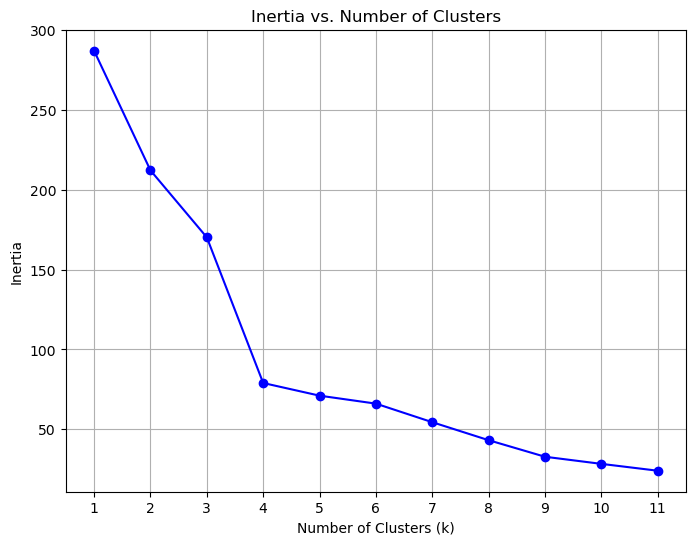

In [144]:
# Plot a line chart with all the inertia values computed with
# the different values of k to visually identify the optimal value for k.

plt.figure(figsize=(8, 6))
plt.plot(k_values, inertia_values, marker='o', linestyle='-', color='b')
plt.title('Inertia vs. Number of Clusters')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(k_values)  # Show every k value on the x-axis
plt.grid(True)
plt.show()

#### Answer the following questions: 

* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:**


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** 

### Cluster Cryptocurrencies with K-means Using the Scaled PCA DataFrame

In [108]:
# Initialize the K-Means model using the best value for k
best_k_pca = 3 

In [111]:
# Fit the K-Means model using the PCA data
kmeans_pca.fit(df_market_data_pca)

c:\Users\dileb\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3, random_state=0)

In [112]:
# Predict the clusters to group the cryptocurrencies using the scaled PCA DataFrame
clusters_pca = kmeans_pca.predict(df_market_data_pca)

# Print the resulting array of cluster values.
print(clusters_pca)

[2 2 0 0 2 2 2 2 2 0 0 0 0 2 0 0 0 0 2 0 0 2 0 0 0 0 0 0 2 0 0 0 1 0 0 0 2
 0 0 0 0]


In [113]:
# Create a copy of the scaled PCA DataFrame
df_market_data_pca_copy = df_market_data_pca.copy()

# Add a new column to the copy of the PCA DataFrame with the predicted clusters
df_market_data_pca_copy['clusters'] = clusters_pca

# Display the copy of the scaled PCA DataFrame
df_market_data_pca_copy.head()

,PC1,PC2,PC3,clusters
coin_id,,,,
bitcoin,-0.600667,0.842760,0.461595,2
ethereum,-0.458261,0.458466,0.952877,2
tether,-0.433070,-0.168126,-0.641752,0
ripple,-0.471835,-0.222660,-0.479053,0
bitcoin-cash,-1.157800,2.041209,1.859715,2


In [114]:
# Create a scatter plot using hvPlot by setting
# `x="PC1"` and `y="PC2"`.
# Color the graph points with the labels found using K-Means and
# add the crypto name in the `hover_cols` parameter to identify
# the cryptocurrency represented by each data point.

df_market_data_pca.hvplot.scatter(x='PC1', y='PC2', by='clusters', hover_cols=['crypto_names'], title='PCA Clustered Cryptocurrencies')

:NdOverlay   [clusters]
   :Scatter   [PC1]   (PC2)

### Visualize and Compare the Results

In this section, you will visually analyze the cluster analysis results by contrasting the outcome with and without using the optimization techniques.

In [115]:
# Composite plot to contrast the Elbow curves
# Composite plots
elbow_curves = elbow_data.hvplot.line(x='k', y='inertia', title='Elbow Curves - Original vs. PCA', width=800, height=400) * elbow_data_pca.hvplot.line(x='k', y='inertia', color='red')
scatter_plots = df_market_data_scaled.hvplot.scatter(x='price_change_percentage_24h', y='price_change_percentage_7d', by='clusters', hover_cols=['crypto_names'], title='Original Data Clusters') + df_market_data_pca.hvplot.scatter(x='PC1', y='PC2', by='clusters', hover_cols=['crypto_names'], title='PCA Data Clusters')

(elbow_curves + scatter_plots).cols(2)

df_market_data

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [116]:
# Composite plot to contrast the clusters
(elbow_curves + scatter_plots).cols(2)

:Layout
   .Overlay.I    :Overlay
      .Curve.I  :Curve   [k]   (inertia)
      .Curve.II :Curve   [k]   (inertia)
   .NdOverlay.I  :NdOverlay   [clusters]
      :Scatter   [price_change_percentage_24h]   (price_change_percentage_7d)
   .NdOverlay.II :NdOverlay   [clusters]
      :Scatter   [PC1]   (PC2)

#### Answer the following question: 

  * **Question:** After visually analyzing the cluster analysis results, what is the impact of using fewer features to cluster the data using K-Means?

  * **Answer:** 

In [ ]:
The best k value using PCA data might differ from the best k value using the original data due to the change in clustering structure after dimensionality reduction.